In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SelectKBest, RFE, chi2
from sklearn.tree import ExtraTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
url = "https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/diabetes.csv"
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:ylabel='Outcome'>

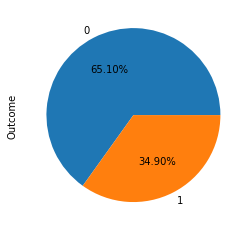

In [31]:
plt.figure(facecolor='white')
df.Outcome.value_counts().plot(kind='pie', autopct='%.2f%%')

In [32]:
X = df.iloc[:,0:8]
y = df.iloc[:, -1]

In [33]:
feature_selector = SelectKBest(chi2, k=4)                            # chi2 is scoring fucntion
feature_selector.fit(X, y)

SelectKBest(k=4, score_func=<function chi2 at 0x00000220370477F0>)

In [34]:
feature_selector.scores_

array([ 111.51969064, 1411.88704064,   17.60537322,   53.10803984,
       2175.56527292,  127.66934333,    5.39268155,  181.30368904])

In [35]:
print("score", feature_selector.scores_)
print("columns", feature_selector.get_feature_names_out())

score [ 111.51969064 1411.88704064   17.60537322   53.10803984 2175.56527292
  127.66934333    5.39268155  181.30368904]
columns ['Glucose' 'Insulin' 'BMI' 'Age']


In [36]:
X[feature_selector.get_feature_names_out()]

,Glucose,Insulin,BMI,Age
0,148,0,33.6,50
1,85,0,26.6,31
2,183,0,23.3,32
3,89,94,28.1,21
4,137,168,43.1,33
...,...,...,...,...
763,101,180,32.9,63
764,122,0,36.8,27
765,121,112,26.2,30
766,126,0,30.1,47


In [37]:
clf = SVC(kernel='linear')
featE1 = RFE(clf)
featE1.fit(X, y)
print('column', featE1.get_feature_names_out())
X[featE1.get_feature_names_out()]

column ['Pregnancies' 'Glucose' 'BMI' 'DiabetesPedigreeFunction']


,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction
0,6,148,33.6,0.627
1,1,85,26.6,0.351
2,8,183,23.3,0.672
3,1,89,28.1,0.167
4,0,137,43.1,2.288
...,...,...,...,...
763,10,101,32.9,0.171
764,2,122,36.8,0.340
765,5,121,26.2,0.245
766,1,126,30.1,0.349


In [38]:
# testing result

X1 = X[feature_selector.get_feature_names_out()]
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=.2, random_state=0)

In [40]:
model1 = KNeighborsClassifier()
model1.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
y_pred = model1.predict(X_test)
cf = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [42]:
print("confusion_matrix:\n", cf)
print("report:\n", cr)

confusion_matrix:
 [[87 20]
 [18 29]]
report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       107
           1       0.59      0.62      0.60        47

    accuracy                           0.75       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.76      0.75      0.75       154



In [43]:
model = make_pipeline(StandardScaler(), KNeighborsClassifier())
model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [44]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[93 14]
 [17 30]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.68      0.64      0.66        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.80      0.80      0.80       154



In [45]:
print(ExtraTreeClassifier().fit(X, y).feature_importances_.tolist())
cols = [1, 2, 3,6]

[0.11366565319834511, 0.30279713230977773, 0.11636184800310709, 0.06305784391693875, 0.04993674479107262, 0.12593239598705422, 0.10618619891572992, 0.12206218287797456]
